In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
movies=pd.read_csv("movies.csv",usecols=["movieId","title"])

In [24]:
movies.head(10)

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
5,6,Heat (1995)
6,7,Sabrina (1995)
7,8,Tom and Huck (1995)
8,9,Sudden Death (1995)
9,10,GoldenEye (1995)


In [25]:
ratings=pd.read_csv("ratings.csv",usecols=["userId","movieId","rating"])
ratings.head(10)

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0
5,1,70,3.0
6,1,101,5.0
7,1,110,4.0
8,1,151,5.0
9,1,157,5.0


In [26]:
ratings.shape

(100836, 3)

In [27]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [28]:
movies.shape

(9742, 2)

In [29]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
dtypes: int64(1), object(1)
memory usage: 152.3+ KB


In [30]:
movies_users = ratings.pivot(index="movieId",columns="userId",values="rating").fillna(0)
movies_users.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


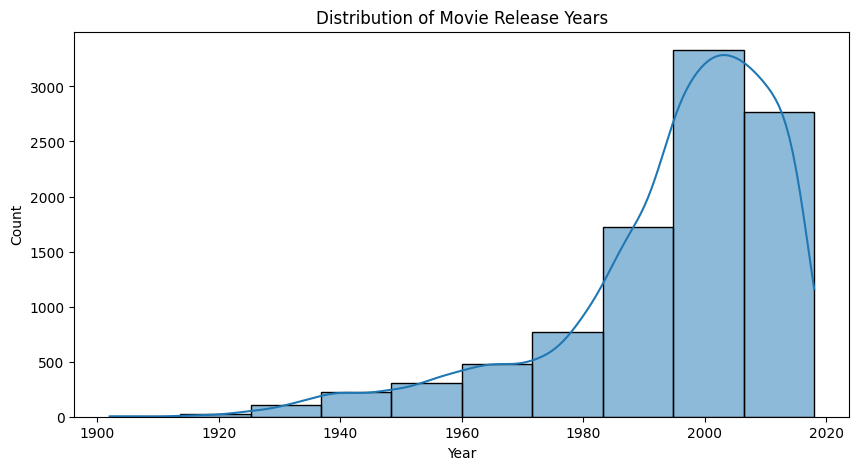

In [31]:
# Movie Release Year Distribution
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)').astype(float)
plt.figure(figsize=(10, 5))
sns.histplot(movies['year'].dropna(), bins=10, kde=True)
plt.title("Distribution of Movie Release Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

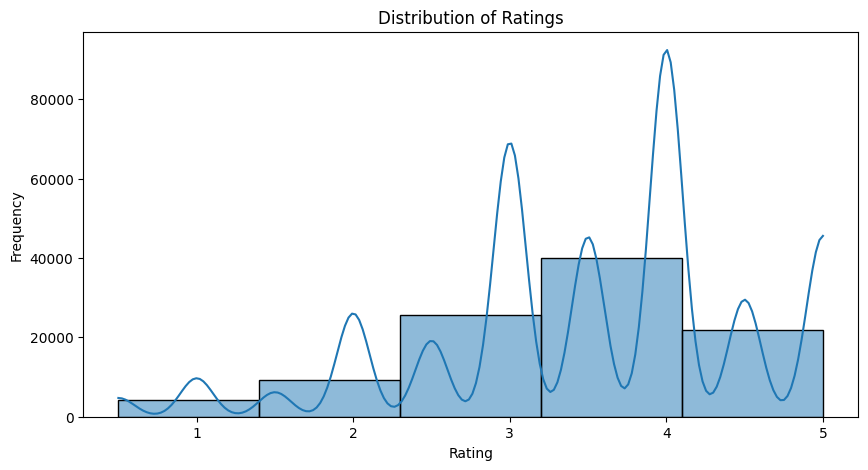

In [40]:
# Ratings Distribution
plt.figure(figsize=(10, 5))
sns.histplot(ratings['rating'], bins=5, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

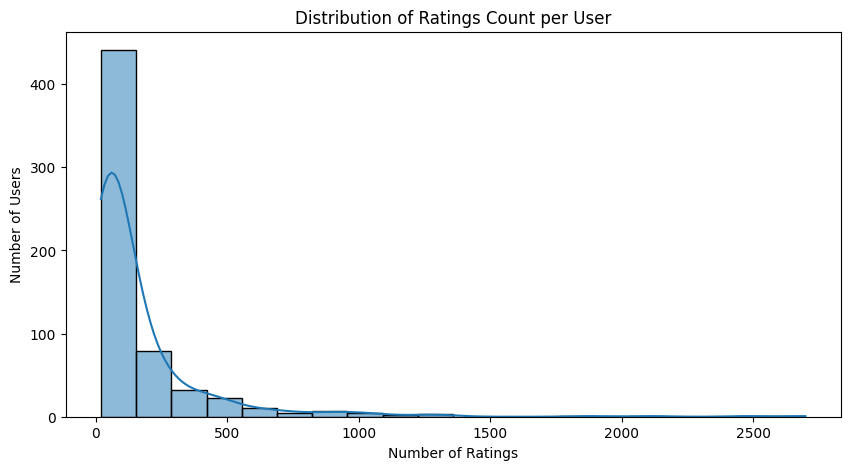

In [41]:
# User Rating Count (ratings per user)
user_rating_count = ratings['userId'].value_counts()
plt.figure(figsize=(10, 5))
sns.histplot(user_rating_count, bins=20, kde=True)
plt.title("Distribution of Ratings Count per User")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Users")
plt.show()

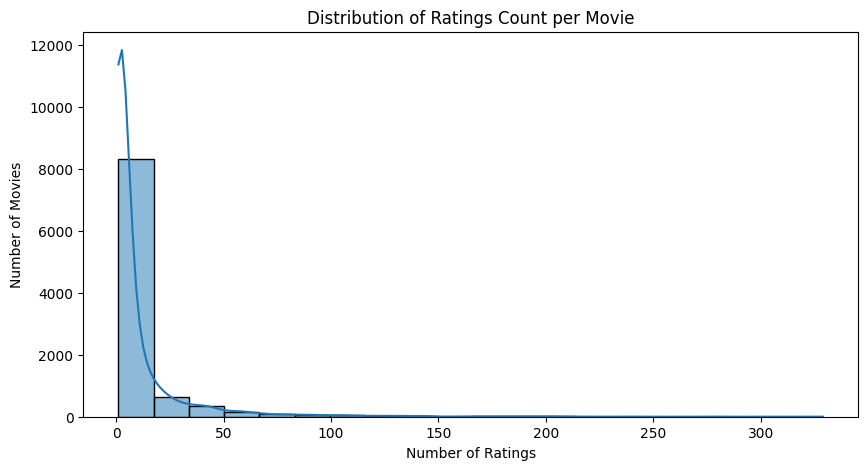

In [42]:
# Movie Rating Count (ratings per movie)
movie_rating_count = ratings['movieId'].value_counts()
plt.figure(figsize=(10, 5))
sns.histplot(movie_rating_count, bins=20, kde=True)
plt.title("Distribution of Ratings Count per Movie")
plt.xlabel("Number of Ratings")
plt.ylabel("Number of Movies")
plt.show()

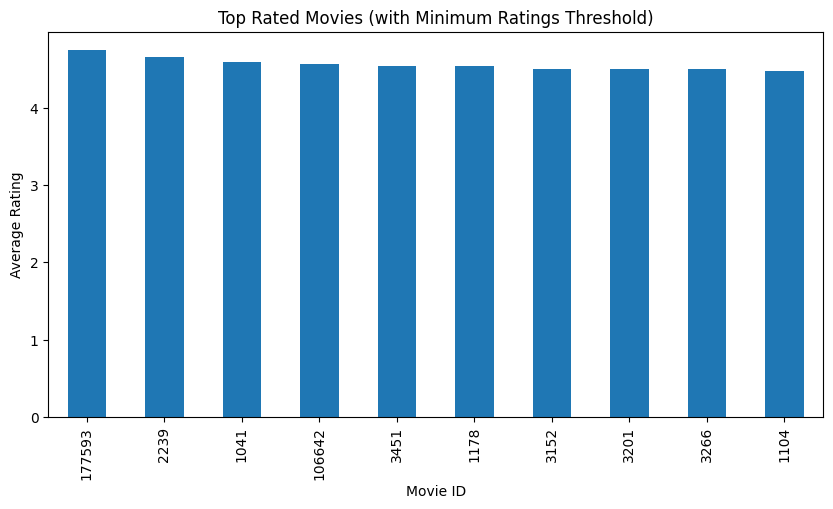

In [43]:

movie_avg_rating = ratings.groupby('movieId')['rating'].mean()
movie_rating_count = ratings.groupby('movieId')['rating'].count()
popular_movies = movie_avg_rating[movie_rating_count > 5].sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
popular_movies.plot(kind='bar')
plt.title("Top Rated Movies (with Minimum Ratings Threshold)")
plt.xlabel("Movie ID")
plt.ylabel("Average Rating")
plt.show()

In [32]:
from scipy.sparse import csr_matrix

In [33]:
mat_movies = csr_matrix(movies_users.values)
mat_movies

<9724x610 sparse matrix of type '<class 'numpy.float64'>'
	with 100836 stored elements in Compressed Sparse Row format>

In [34]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(metric = "cosine",algorithm = "brute",n_neighbors = 20)
model.fit(mat_movies)

NearestNeighbors(algorithm='brute', metric='cosine', n_neighbors=20)

In [35]:
!pip install fuzzywuzzy

In [36]:
!pip install python-Levenshtein

In [37]:
from fuzzywuzzy import process
# to improve searching process

In [38]:
def recommender(movie_name,data,n):
    idx = process.extractOne(movie_name,movies["title"])[2]
    print("Movie Selected : ",movies["title"][idx],"Index : ",idx)
    print("Searching for recommendation.................")
    distance,indices = model.kneighbors(data[idx],n_neighbors=n)
    for i in indices : 
        print(movies["title"][i].where(i!=idx))

In [39]:
recommender("iron man",mat_movies,10)

Movie Selected :  Iron Man (2008) Index :  6743
Searching for recommendation.................
6743                                            NaN
7197                                  Garage (2007)
7195                        Merry Madagascar (2009)
7354                             A-Team, The (2010)
6726                         Superhero Movie (2008)
7137                         Thirst (Bakjwi) (2009)
7026                                 Scorpio (1973)
7571                                 Win Win (2011)
3880                  Look Who's Talking Now (1993)
6388    After the Wedding (Efter brylluppet) (2006)
Name: title, dtype: object
